## 1. OCR(문자인식)의 이해와 실습

ex) 차를 타고 들어가면 자동차에 있는 이 번호판을 자동으로 인식을 하고 그 안에 있는 글자들을 인식을 해서 이 사람이 이 건물에 정확하게 들어올 수 있는 사람인지 아닌지를 판단을 하게끔 하는 것 

지금 보게 될 마이크로소프트의 Cognitive Service에 있는 OCR 기능을 이용하게 되면 사진 속에 있는 이런 글자들을 정확하게 인식을 할 수 있게끔 굉장히 많은 학습이 돼 있고요 또 굉장히 많은 언어들이 이미 준비가 되어있습니다 그래서 바로 인식이 가능하게끔 그렇게 되어 있습니다

OCR 하기 전 해야 할 작업

=> 정확도(인식률)를 높이기 위해 이미지에 대한 전처리 작업  
ex) 기울어진 사진, 일자로 안펴져있는 사진 - 알고리즘들이 있음

### OCR 실습 - 문자인식

#### 관련된 패키지를 import 한다

In [70]:
import requests

In [71]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
from io import BytesIO

#### Subscription Key와 호출 URL을 셋팅합니다.

In [72]:
subscription_key = "6c01e632a4574f7287430b62514f6928"
assert subscription_key

In [73]:
vision_base_url = "https://kmooc--vision.cognitiveservices.azure.com/vision/v2.0/"

In [74]:
ocr_url = vision_base_url + "ocr"

API는 OCR만 되는게 아니라 몇 가지 기능이 있기 때문에 그걸 구별하기 위해서 그 주소 뒤에 OCR을 붙여서 호출해야 정확하게 OCR 기능이 호출된다,

#### 분석할 이미지를 셋팅 한다.

In [75]:
image_url = "https://www.wordsonimages.com/pics/193702-Saying%2C+quote%2C+wise%2C+deep%2C+lif.jpg"

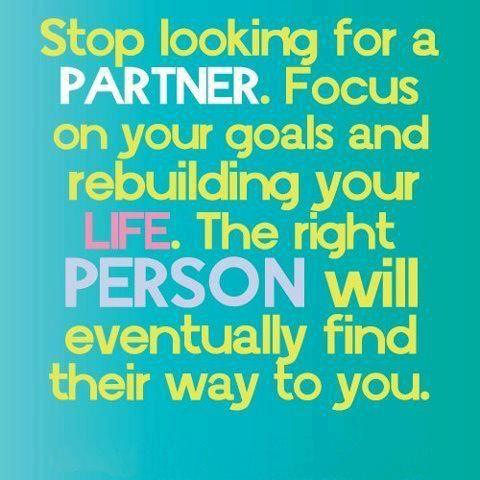

In [76]:
image = Image.open(BytesIO(requests.get(image_url).content))
image

#### 헤더 정보를 셋팅한다.

In [77]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}  # header정보에서 가장 먼저 key값
params = {'language': 'unk', 'detectOrientation': 'true'}  
data = {'url': image_url}

#### 서비스를 요청하고 결과를 확인한다

In [78]:
response = requests.post(ocr_url, headers = headers, params = params, json=data)
response.raise_for_status()

In [79]:
analysis = response.json()

In [80]:
analysis

{'language': 'en',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '41,18,398,393',
   'lines': [{'boundingBox': '41,18,398,49',
     'words': [{'boundingBox': '41,18,103,49', 'text': 'Stop'},
      {'boundingBox': '161,18,156,47', 'text': 'looking'},
      {'boundingBox': '334,18,63,38', 'text': 'for'},
      {'boundingBox': '413,29,26,27', 'text': 'a'}]},
    {'boundingBox': '60,67,359,38',
     'words': [{'boundingBox': '60,67,210,37', 'text': 'PARTNER.'},
      {'boundingBox': '286,67,133,38', 'text': 'Focus'}]},
    {'boundingBox': '54,114,375,45',
     'words': [{'boundingBox': '54,124,54,26', 'text': 'on'},
      {'boundingBox': '117,124,96,35', 'text': 'your'},
      {'boundingBox': '226,114,107,44', 'text': 'goals'},
      {'boundingBox': '349,114,80,36', 'text': 'and'}]},
    {'boundingBox': '69,160,351,51',
     'words': [{'boundingBox': '69,160,230,50', 'text': 'rebuilding'},
      {'boundingBox': '311,171,109,40', 'text': 'your'}]},
    {'boundingBox'

'boundingBox'라는 요소들을 하나씩 가지고 와서 실제 그 image 위에 글자를 매핑하는 것이다.

In [81]:
line_infots = [region["lines"] for region in analysis["regions"]]
word_infos = []

for line in line_infots:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
word_infos

[{'boundingBox': '41,18,103,49', 'text': 'Stop'},
 {'boundingBox': '161,18,156,47', 'text': 'looking'},
 {'boundingBox': '334,18,63,38', 'text': 'for'},
 {'boundingBox': '413,29,26,27', 'text': 'a'},
 {'boundingBox': '60,67,210,37', 'text': 'PARTNER.'},
 {'boundingBox': '286,67,133,38', 'text': 'Focus'},
 {'boundingBox': '54,124,54,26', 'text': 'on'},
 {'boundingBox': '117,124,96,35', 'text': 'your'},
 {'boundingBox': '226,114,107,44', 'text': 'goals'},
 {'boundingBox': '349,114,80,36', 'text': 'and'},
 {'boundingBox': '69,160,230,50', 'text': 'rebuilding'},
 {'boundingBox': '311,171,109,40', 'text': 'your'},
 {'boundingBox': '86,212,94,37', 'text': 'LIFE.'},
 {'boundingBox': '197,212,81,38', 'text': 'The'},
 {'boundingBox': '295,212,101,47', 'text': 'right'},
 {'boundingBox': '65,256,239,52', 'text': 'PERSON'},
 {'boundingBox': '324,257,94,50', 'text': 'will'},
 {'boundingBox': '65,315,242,50', 'text': 'eventually'},
 {'boundingBox': '324,314,93,40', 'text': 'find'},
 {'boundingBox': 

(-0.5, 479.5, 479.5, -0.5)

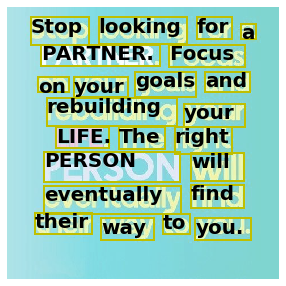

In [82]:
plt.figure(figsize=(5,5))
Image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image, alpha=0.5)

for word in word_infos:
    bbox = [int(num) for num in word["boundingBox"].split(",")]
    text = word["text"]
    origin = (bbox[0], bbox[1])
    patch = Rectangle(origin, bbox[2], bbox[3], fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=20, weight='bold', va='top')
plt.axis("off")

#### 한글이 잘 되는지 테스트 한다.

In [85]:
image_url = "https://www.aarki.com/hs-fs/hubfs/Flashy-Vs-Simple-KR.jpg?width=1022&name=Flashy-Vs-Simple-KR.jpg"

In [86]:
image = Image.open(BytesIO(requests.get(image_url).content))
image

AttributeError: 'JpegImageFile' object has no attribute 'open'

In [87]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}  # header정보에서 가장 먼저 key값
params = {'language': 'unk', 'detectOrientation': 'true'}  
data = {'url': image_url}

In [88]:
response = requests.post(ocr_url, headers = headers, params = params, json=data)
response.raise_for_status()

In [89]:
analysis = response.json()

In [90]:
analysis

{'language': 'ko',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '300,28,431,31',
   'lines': [{'boundingBox': '300,28,431,31',
     'words': [{'boundingBox': '300,28,86,31', 'text': '플레시'},
      {'boundingBox': '399,36,33,19', 'text': 'vs'},
      {'boundingBox': '444,28,89,30', 'text': '간단한'},
      {'boundingBox': '544,28,58,30', 'text': '광고'},
      {'boundingBox': '613,28,118,31', 'text': '퍼포먼스'}]}]}]}

In [92]:
line_infots = [region["lines"] for region in analysis["regions"]]
word_infos = []

for line in line_infots:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
word_infos

[{'boundingBox': '300,28,86,31', 'text': '플레시'},
 {'boundingBox': '399,36,33,19', 'text': 'vs'},
 {'boundingBox': '444,28,89,30', 'text': '간단한'},
 {'boundingBox': '544,28,58,30', 'text': '광고'},
 {'boundingBox': '613,28,118,31', 'text': '퍼포먼스'}]